In [1]:
import pandas as pd 
import sklearn
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('owid-covid-data.csv', index_col=0)

In [48]:
europe_df = df.loc[df.continent == "Europe"]

europe_df = europe_df.drop(["continent"], axis=1)

## after second wave, before spread of new UK variant
mask = (europe_df['date'] > "2020-08-31") & (europe_df['date'] < "2020-12-01")
europe_2_wave_df = europe_df.loc[mask] 

country_df = europe_2_wave_df.set_index(["date","location"])

In [49]:
country_df.head()

,,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,location,,,,,,,,,,,,,,,,,,,,,
2020-09-01,Albania,9606.0,93.0,121.000,290.0,6.0,4.429,3337.967,32.316,42.046,100.771,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
2020-09-02,Albania,9728.0,122.0,114.429,296.0,6.0,4.714,3380.360,42.393,39.763,102.856,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
2020-09-03,Albania,9844.0,116.0,108.714,301.0,5.0,5.000,3420.669,40.309,37.777,104.594,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
2020-09-04,Albania,9967.0,123.0,110.286,306.0,5.0,5.000,3463.410,42.741,38.323,106.331,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
2020-09-05,Albania,10102.0,135.0,117.571,312.0,6.0,5.286,3510.320,46.911,40.855,108.416,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785


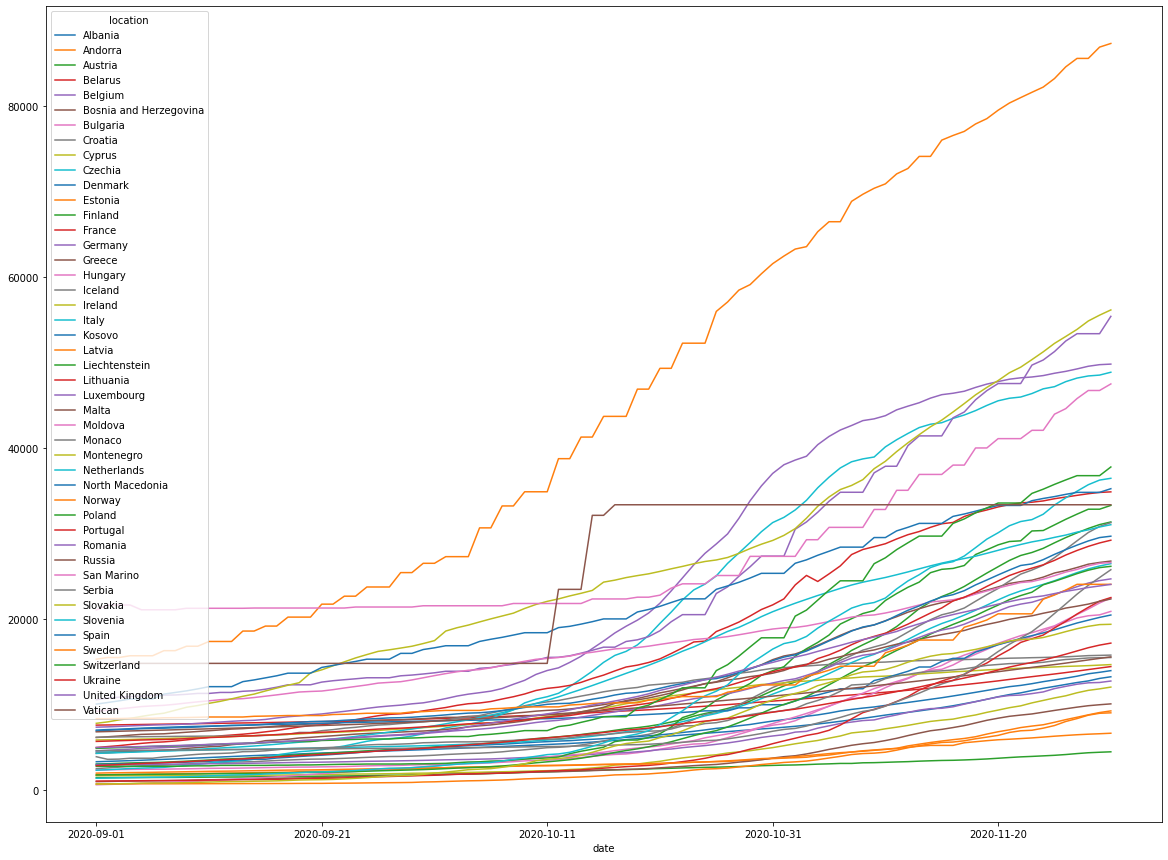

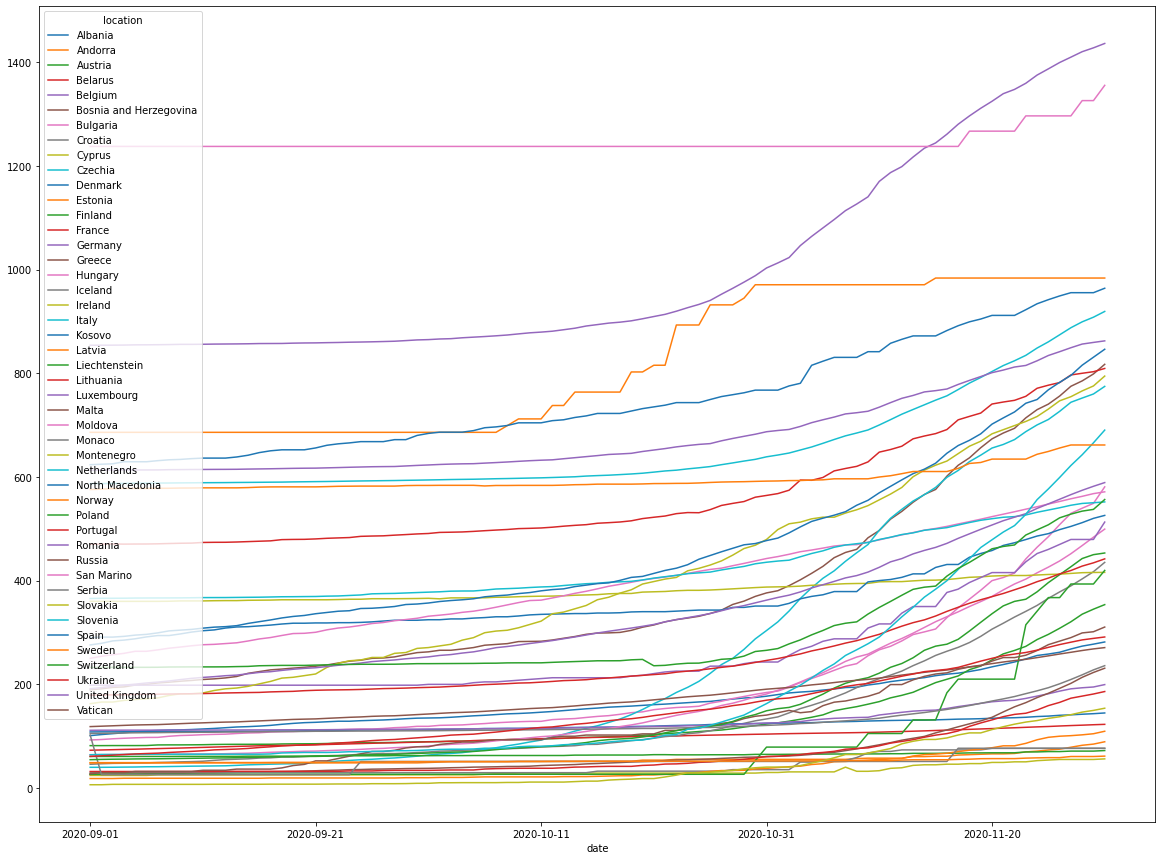

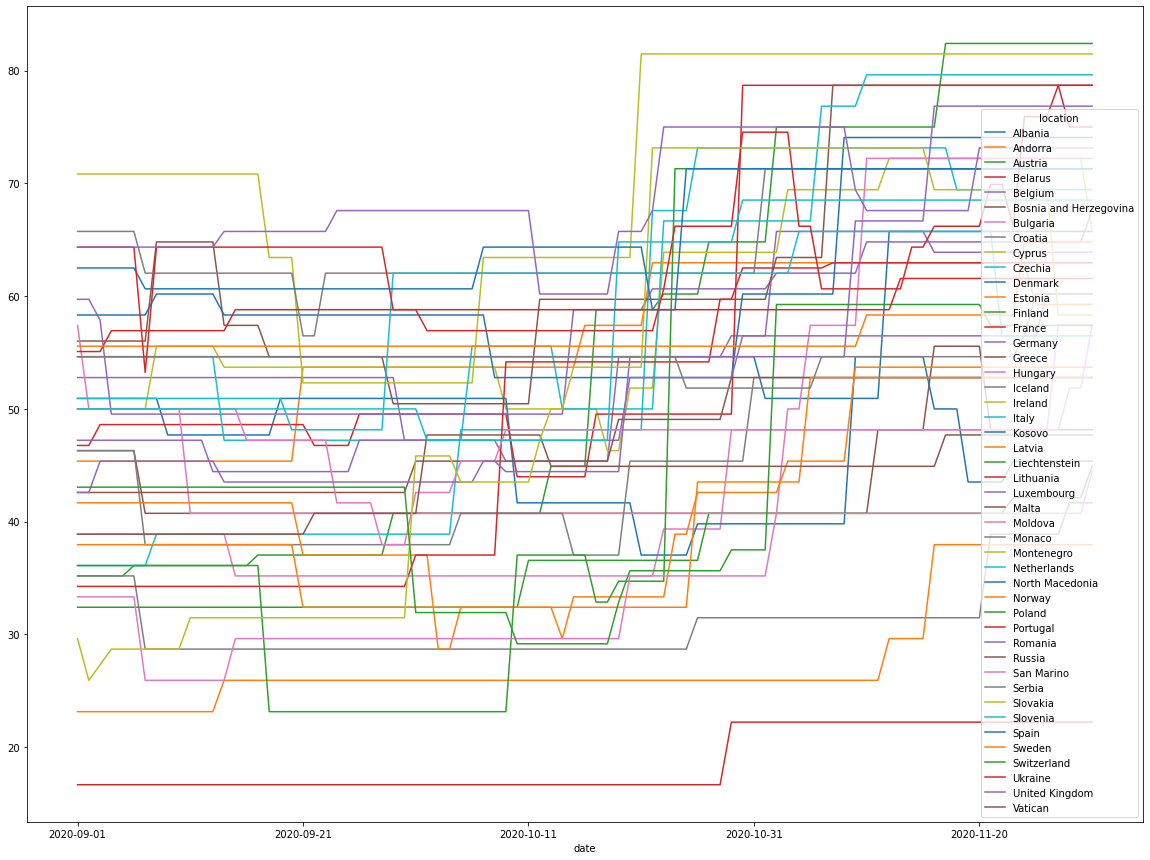

In [89]:
## these plots have too many countries - 
## find a way to separate them 

total_cases_df = country_df.total_cases_per_million
total_cases_df = total_cases_df.unstack()
total_cases_df.plot(figsize=(20,15))

total_deaths_df = country_df.total_deaths_per_million
total_deaths_df = total_deaths_df.unstack()
total_deaths_df.plot(figsize=(20,15))

stringency_df = country_df.stringency_index
stringency_df = stringency_df.unstack()
stringency_df.plot(figsize=(20,15))

In [122]:
from sklearn.preprocessing import StandardScaler

scaled_df = country_df.copy()
scaled_df = scaled_df.drop(["handwashing_facilities",
                            "tests_units",
                            "total_vaccinations",
                           "total_vaccinations_per_hundred"],axis=1)

scaler = StandardScaler()
scaled_df = scaled_df.copy()
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

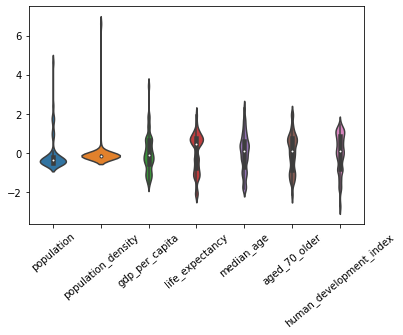

In [123]:
population_df = scaled_df[["population",
                           "population_density",
                            "gdp_per_capita",
                            "life_expectancy",
                           "median_age",
                           "aged_70_older", 
                           "human_development_index"
                           ]].copy()
sns.violinplot(data=population_df)
plt.xticks(rotation=40)


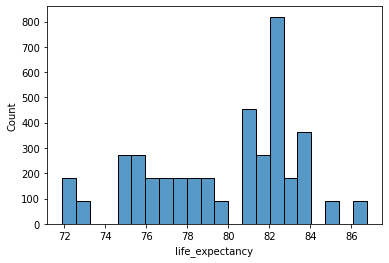

In [142]:
sns.histplot(country_df.life_expectancy)
## life expectancy has a natural split at 80 
## so i parted the data here into "young" and "old"

In [104]:
young_df = country_df.loc[country_df.life_expectancy <= 80] 
old_df = country_df.loc[country_df.life_expectancy > 80] 

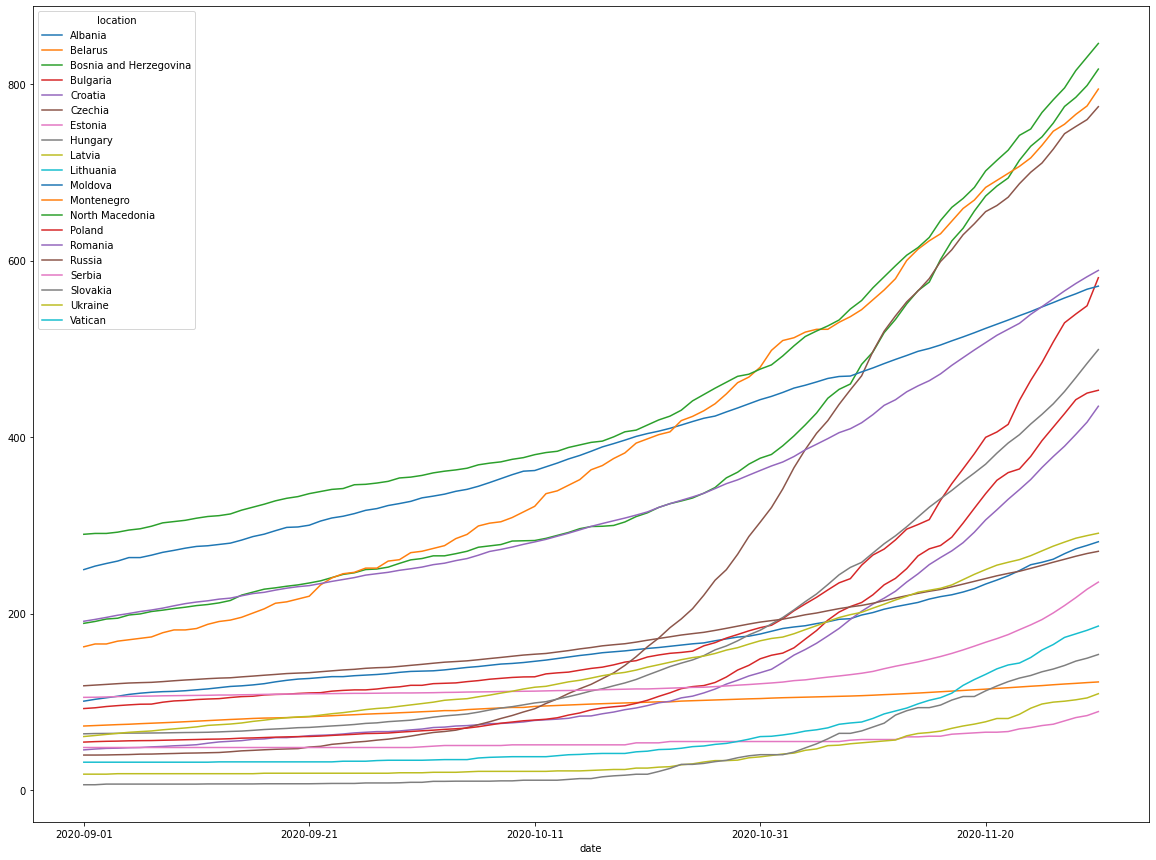

In [105]:
total_deaths_df = young_df.total_deaths_per_million
total_deaths_df = total_deaths_df.unstack()
total_deaths_df.plot(figsize=(20,15))

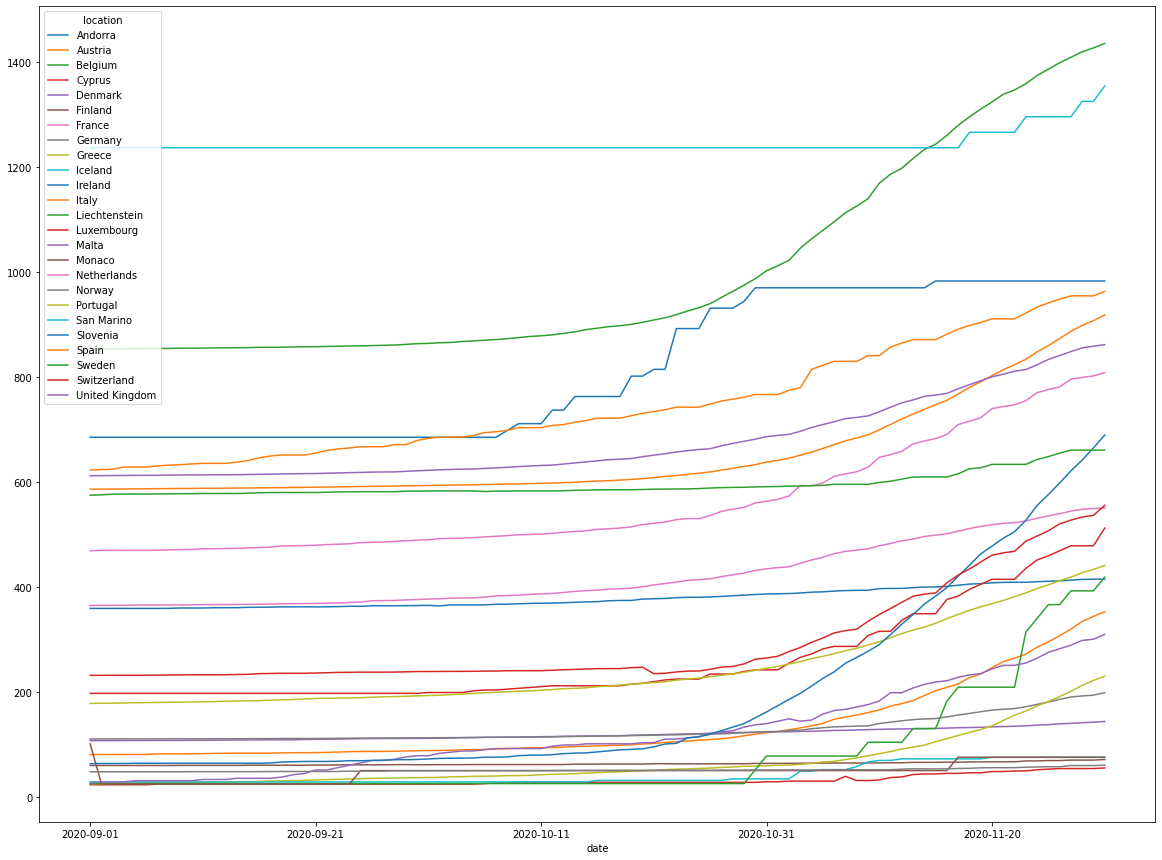

In [106]:
total_deaths_df = old_df.total_deaths_per_million
total_deaths_df = total_deaths_df.unstack()
total_deaths_df.plot(figsize=(20,15))

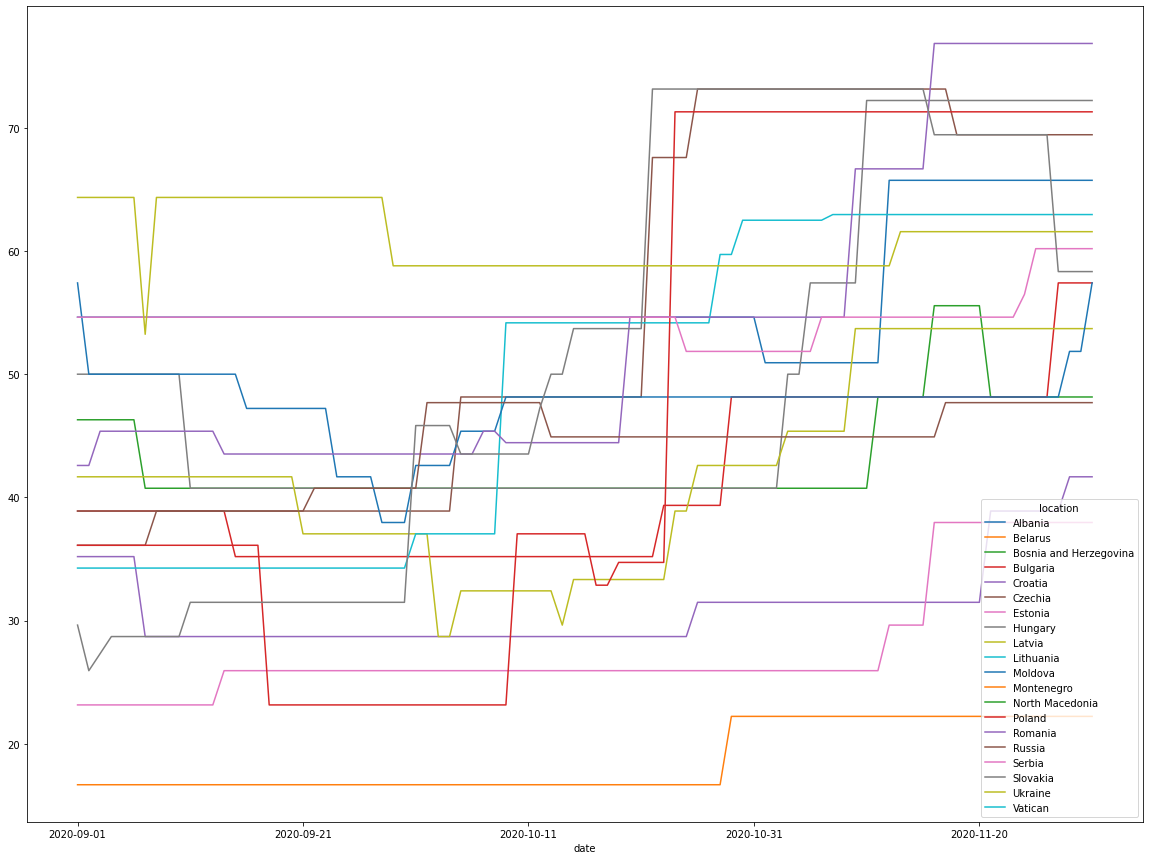

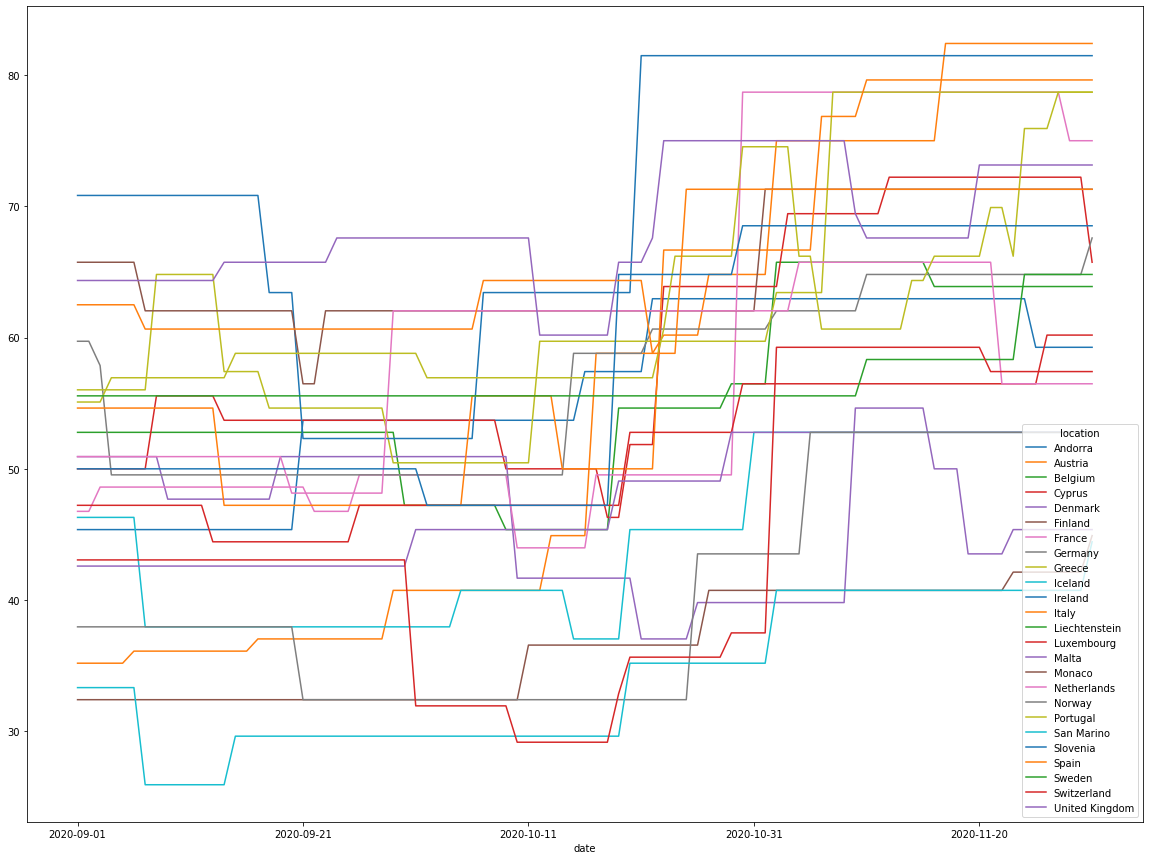

In [99]:
stringency_df = young_df.stringency_index
stringency_df = stringency_df.unstack()
stringency_df.plot(figsize=(20,15))

stringency_df = old_df.stringency_index
stringency_df = stringency_df.unstack()
stringency_df.plot(figsize=(20,15))

## stringency generally increases over time for both groups

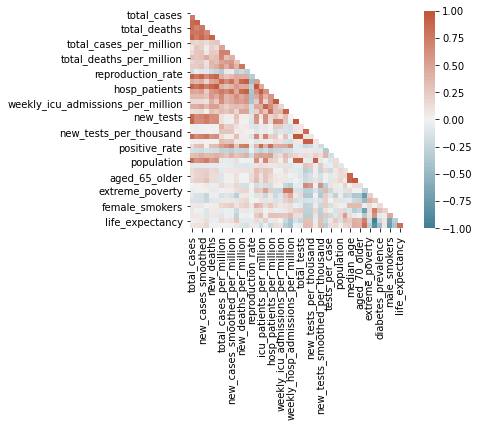

In [107]:
corr = scaled_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 mask=mask, square=True)

In [124]:
scaled_df.dropna(inplace=True)
## Bartlett's test, if p < 0.05 then continue with FA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value = calculate_bartlett_sphericity(scaled_df)
chi_square_value, p_value

(12992.26931946085, 0.0)

In [125]:
## kmo, want > 0.6 for FA
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(scaled_df)
kmo_model

nan

[23.78796526 10.70674582  4.53219989  2.88505988  0.93190095]


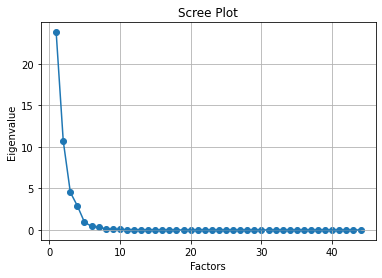

In [131]:
fa = FactorAnalyzer()
fa.fit(scaled_df)

eigen_values, vectors = fa.get_eigenvalues()

## scree plot 
plt.scatter(range(1,scaled_df.shape[1]+1),eigen_values)
plt.plot(range(1,scaled_df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()



In [132]:
fa = FactorAnalyzer()
fa.set_params(n_factors=4, rotation='varimax') 
fa.fit(scaled_df)
loadings = fa.loadings_

In [140]:
loadings = pd.DataFrame(loadings, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'], index=scaled_df.columns)

var_table = fa.get_factor_variance()
## 94.7% variance explained by 4 factors 
eigenvalues = var_table[1]
print(var_table)

(array([17.23514096, 10.55688349,  7.14294376,  6.7582514 ]), array([0.39170775, 0.23992917, 0.16233963, 0.15359662]), array([0.39170775, 0.63163692, 0.79397655, 0.94757317]))


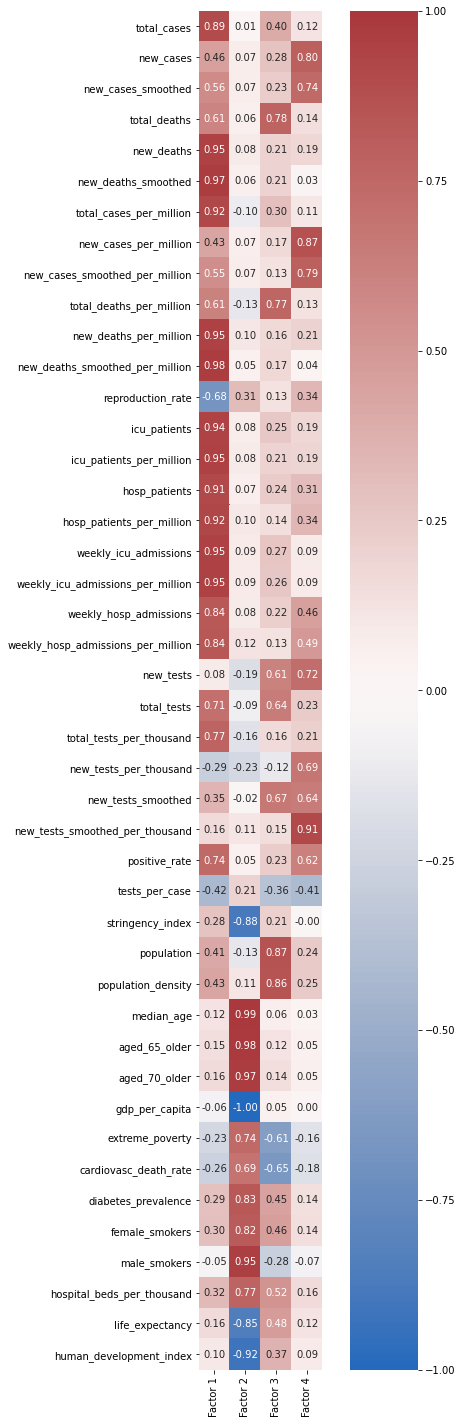

In [141]:
plt.figure(figsize=(10,25))
ax = sns.heatmap(loadings,
                vmin=-1,
                vmax=1,
                center=0,
                 cmap="vlag",
                square=True,
                annot=True, ## show numbers
                fmt='.2f' ## 2dp numbers
                )

In [143]:
## Factor Analysis:
## 1: deaths, hospital, icu, total cases, positivity rate (how bad is it)
## 2: age, health, poverty, stringency, development index (how "healthy")
## 3: population, population density together (size/density)
## 4: new cases and new tests (~improved capacity)

##  maybe new cases doesn't increase as much when the outbreak is
## bad since they focus resources elsewhere

## new cases is in a different factor than deaths and hospital admissions
## e.g. maybe new cases is too varied across countries to use


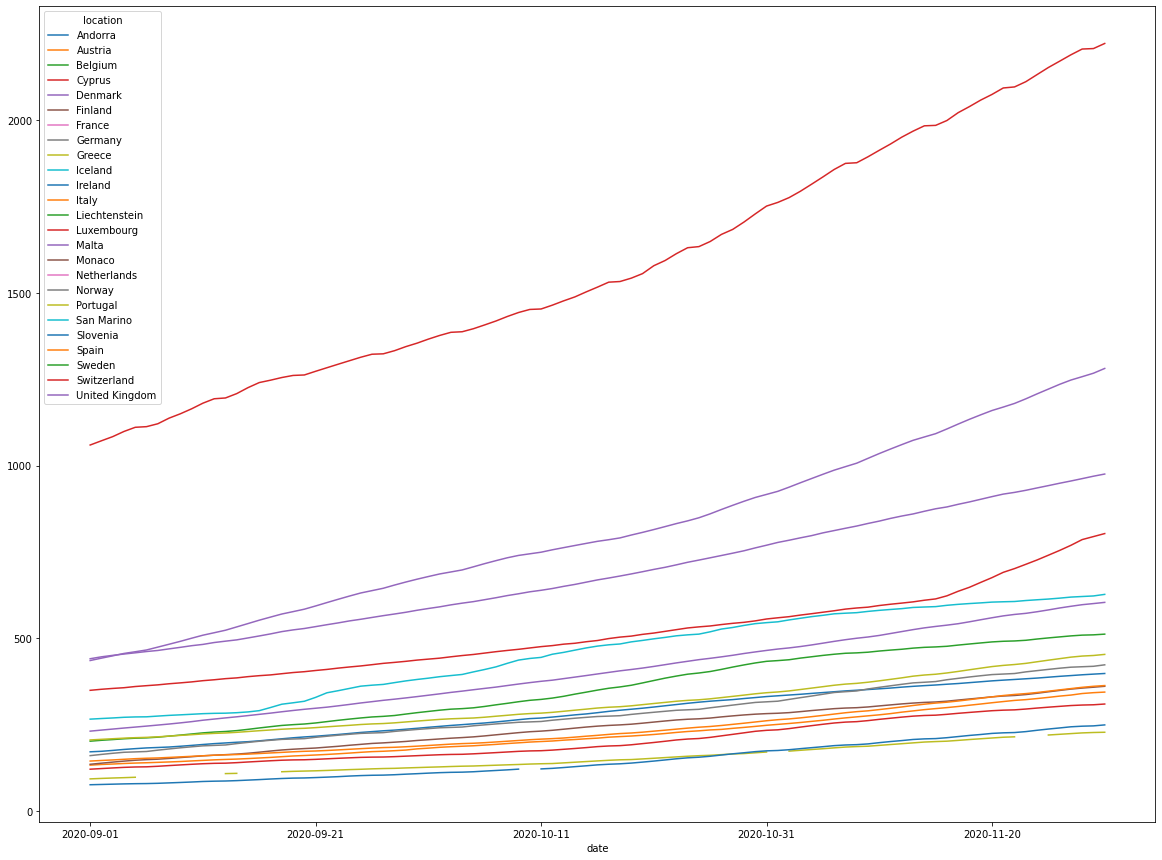

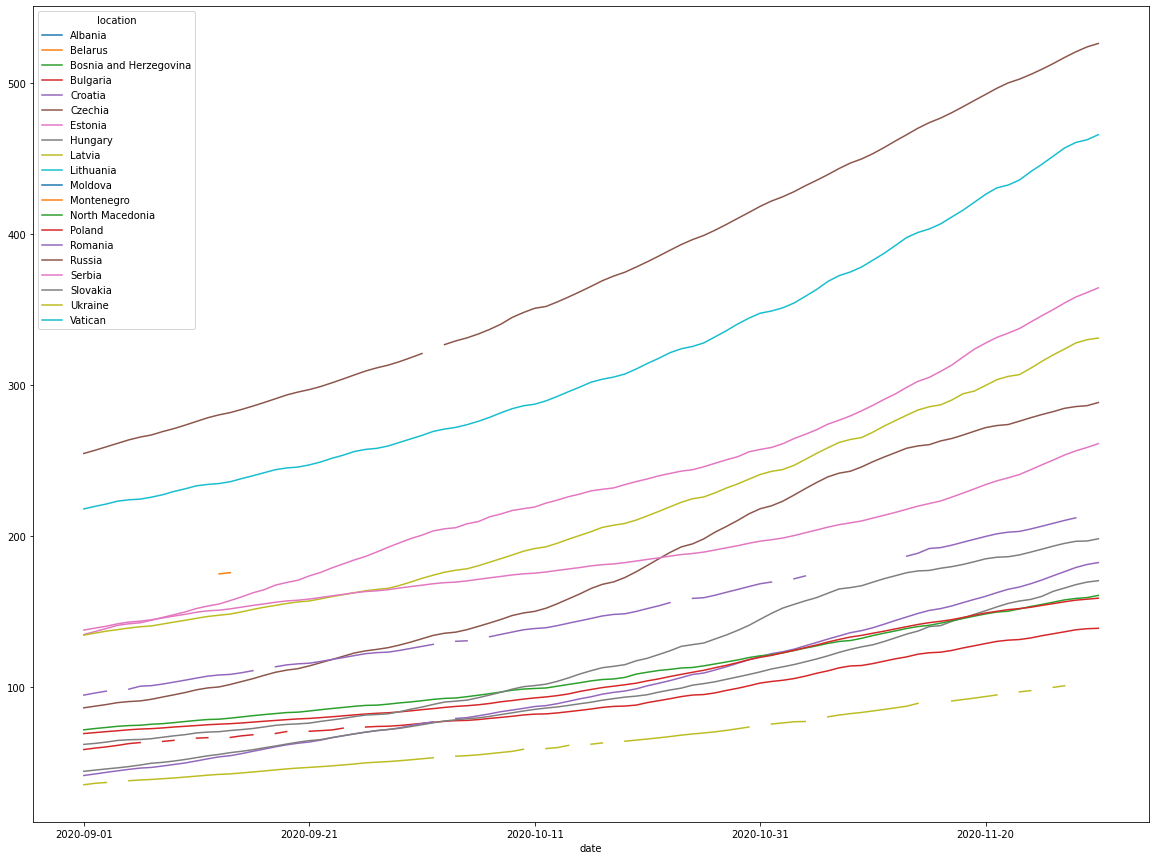

In [182]:
tests_df = old_df.total_tests_per_thousand
tests_df = tests_df.unstack()
tests_df.plot(figsize=(20,15))

tests_df = young_df.total_tests_per_thousand
tests_df = tests_df.unstack()
tests_df.plot(figsize=(20,15))

## are these enough? similar enough?

In [226]:
tests_df = country_df.new_tests_per_thousand
tests_df =  tests_df.dropna()
tests_df = tests_df.reset_index()

tests_df = pd.pivot_table(tests_df, 
                          values='new_tests_per_thousand', 
                          index=['date'],
                          columns=['location'], 
                          aggfunc=np.sum)

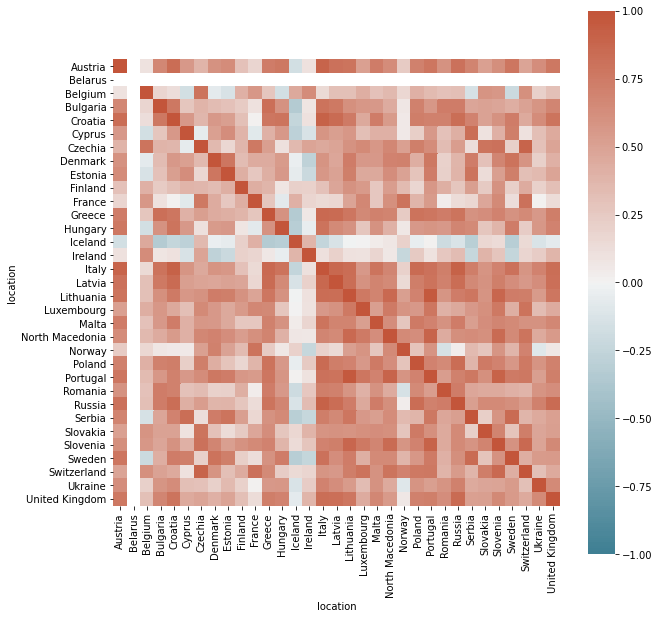

In [228]:
corr = tests_df.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 square=True)

## number of tests per person mostly highly correlated between countries 
## Belarus has no data - remove from sample?
## Possible outliers:
## Iceland, Ireland

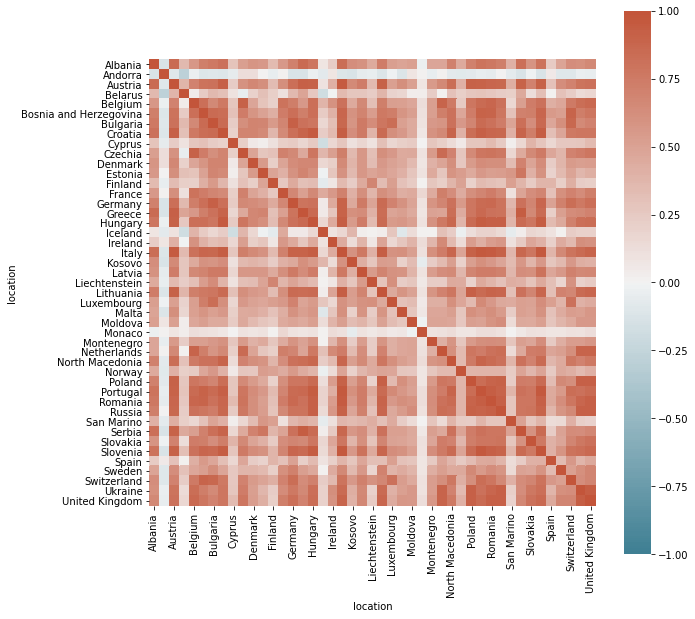

In [225]:
deaths_df = country_df.new_deaths_per_million
deaths_df = deaths_df.dropna()
deaths_df = deaths_df.reset_index()
deaths_df = pd.pivot_table(deaths_df, 
                          values='new_deaths_per_million', 
                          index=['date'],
                          columns=['location'], 
                          aggfunc=np.sum)
corr = deaths_df.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                  square=True)
## Countries that don't have correlated deaths:
## Andorra, Iceland, Monaco, San Marino, Cyprus
## all very small populations or isolated
## maybe remove these countries from analysis? 

(15.0, 85.0)

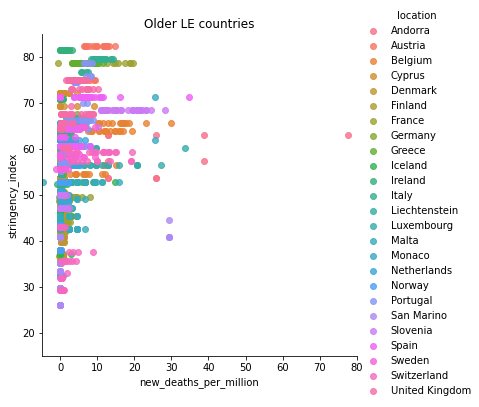

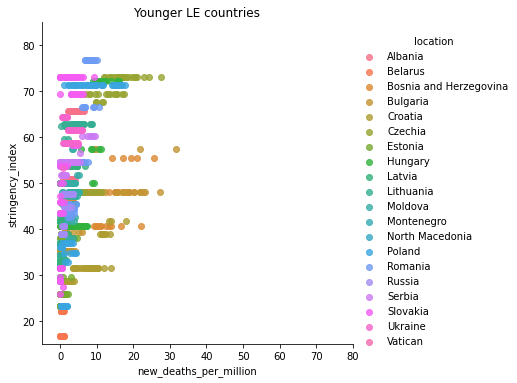

In [192]:
sns.lmplot(x="new_deaths_per_million",y="stringency_index", data=old_df.reset_index(),
          fit_reg=False,
          hue="location") 
plt.title("Older LE countries")
plt.xlim(-5,80)
plt.ylim(15,85)
sns.lmplot(x="new_deaths_per_million", y="stringency_index", data=young_df.reset_index(),
          fit_reg=False,
          hue="location") 
plt.title("Younger LE countries")
plt.xlim(-5,80)
plt.ylim(15,85)

(0.0, 4000.0)

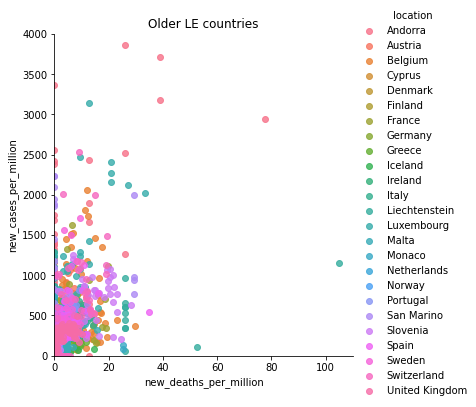

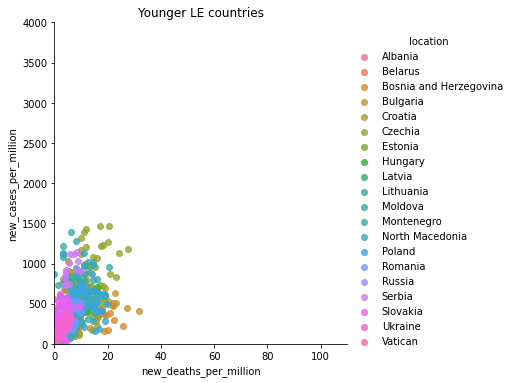

In [193]:
sns.lmplot(x="new_deaths_per_million",y="new_cases_per_million", data=old_df.reset_index(),
          fit_reg=False,
          hue="location") 
plt.xlim(0,110)
plt.ylim(0,4000)
plt.title("Older LE countries")
sns.lmplot(x="new_deaths_per_million", y="new_cases_per_million", data=young_df.reset_index(),
          fit_reg=False,
          hue="location") 
plt.title("Younger LE countries")
plt.xlim(0,110)
plt.ylim(0,4000)

/home/charlotte/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


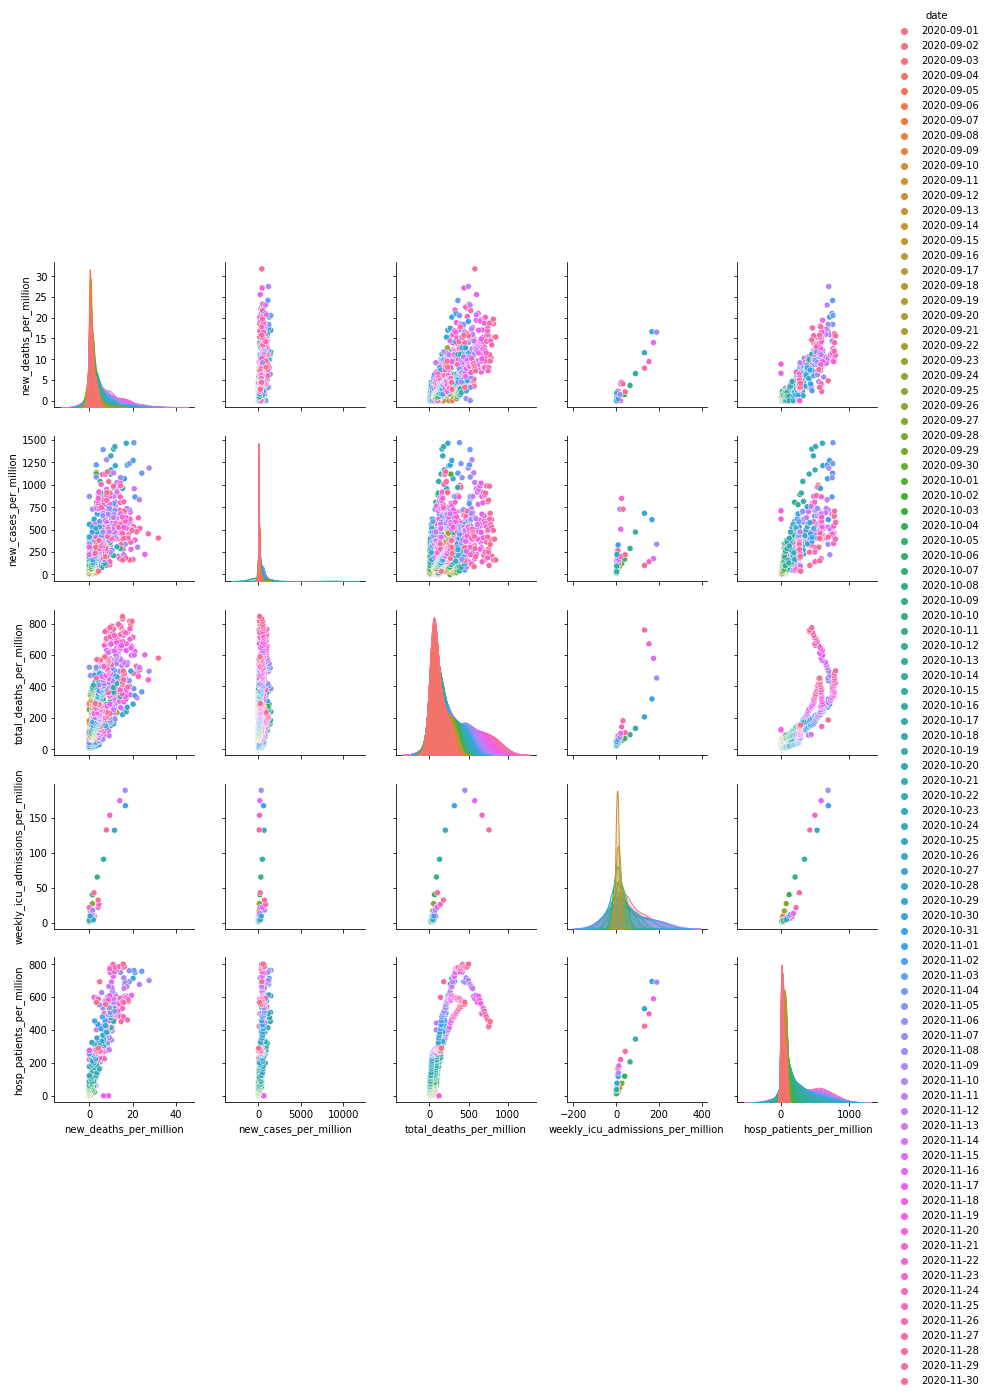

In [200]:
hist_df = young_df[["new_deaths_per_million",
                   "new_cases_per_million",
                   "total_deaths_per_million",
                    "weekly_icu_admissions_per_million",
                    "hosp_patients_per_million"]].copy()

sns.pairplot(hist_df.reset_index(), hue='date')

/home/charlotte/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


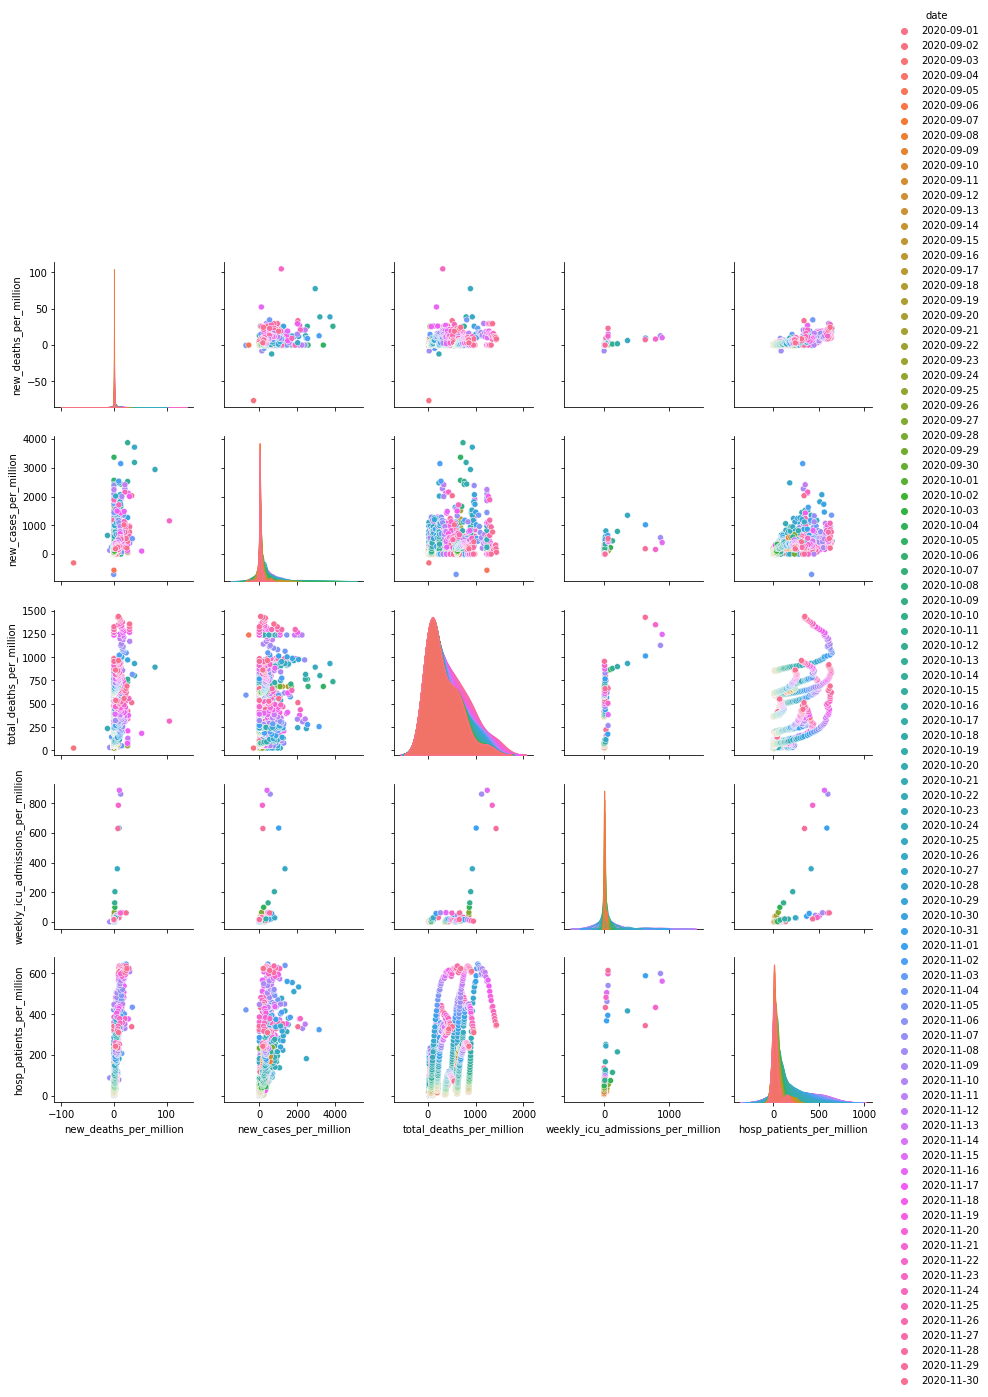

In [201]:
hist_df = old_df[["new_deaths_per_million",
                   "new_cases_per_million",
                   "total_deaths_per_million",
                    "weekly_icu_admissions_per_million",
                    "hosp_patients_per_million"]].copy()

sns.pairplot(hist_df.reset_index(), hue='date')

In [230]:
average_df = young_df.groupby(['date']).mean()
average_df.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-09-01,76935.05,526.75,555.17845,1671.315789,16.105263,12.40715,4447.26245,35.37760,37.40890,102.080632,...,20393.459211,1.246667,348.690526,7.152632,24.15,43.166667,93.954,6.136105,76.159,0.813842
2020-09-02,77555.10,620.05,564.29995,1685.947368,14.631579,12.44285,4494.05730,46.79495,38.01260,103.118368,...,20393.459211,1.246667,348.690526,7.152632,24.15,43.166667,93.954,6.136105,76.159,0.813842
2020-09-03,78189.05,633.95,572.80710,1700.578947,14.631579,12.48570,4547.13735,53.08010,39.78095,103.963158,...,20393.459211,1.246667,348.690526,7.152632,24.15,43.166667,93.954,6.136105,76.159,0.813842
2020-09-04,78854.50,665.45,581.27145,1714.894737,14.315789,12.56420,4597.29445,50.15715,40.44745,104.901000,...,20393.459211,1.246667,348.690526,7.152632,24.15,43.166667,93.954,6.136105,76.159,0.813842
2020-09-05,79511.05,656.55,589.58565,1729.105263,14.210526,12.82865,4650.32975,53.03525,42.17570,105.979895,...,20393.459211,1.246667,348.690526,7.152632,24.15,43.166667,93.954,6.136105,76.159,0.813842


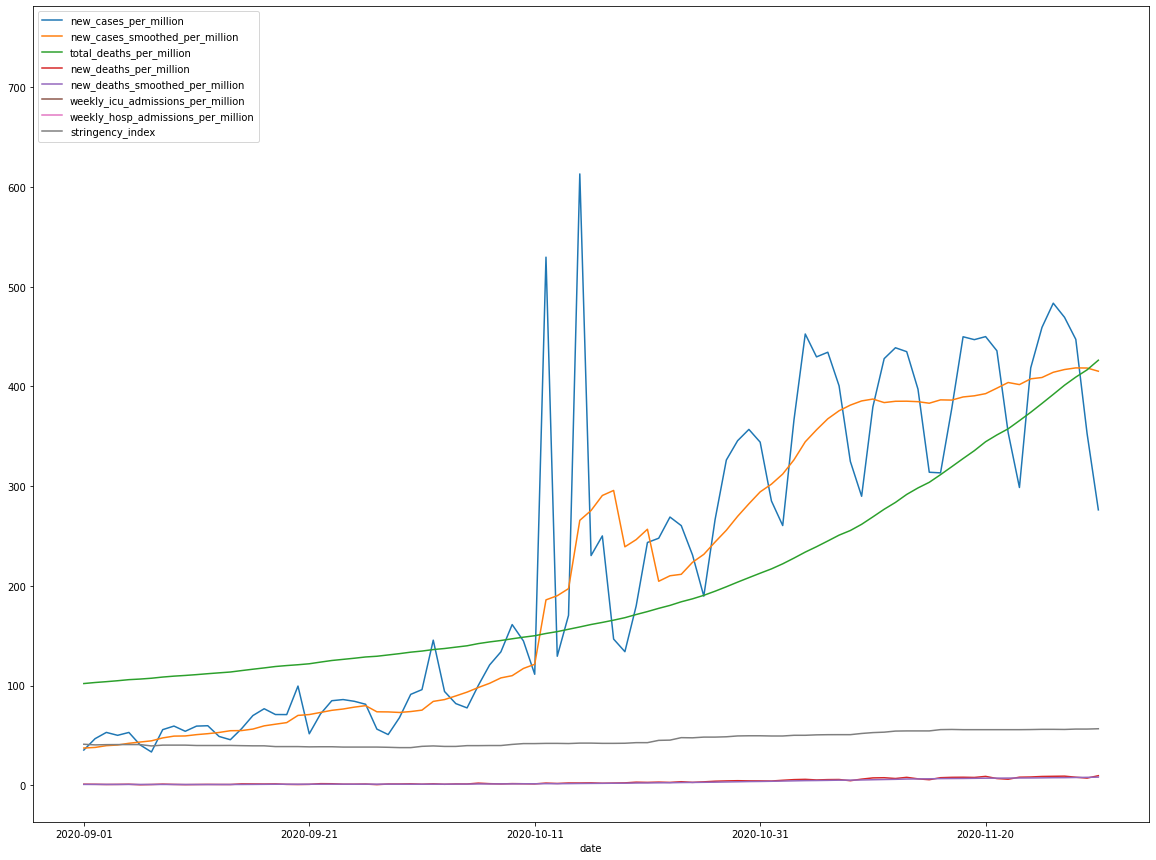

In [237]:
covid_average_df = average_df[[#"total_cases_per_million",
               "new_cases_per_million",
               "new_cases_smoothed_per_million",
               "total_deaths_per_million",
               "new_deaths_per_million",
               "new_deaths_smoothed_per_million",
               "weekly_icu_admissions_per_million",
               "weekly_hosp_admissions_per_million",
               "stringency_index"]].copy()

covid_average_df.plot(figsize=(20,15))

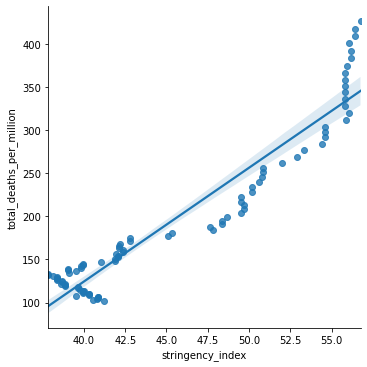

In [238]:
sns.lmplot(x="stringency_index", 
           y="total_deaths_per_million",
          data=average_df)